# Latar Belakang
Dalam beberapa tahun terakhir, platform berbagi rumah Airbnb telah mengalami pertumbuhan eksponensial, mengubah lanskap industri perhotelan di seluruh dunia. Wisatawan dan pelancong kini memiliki beragam akomodasi untuk dipilih, mulai dari seluruh rumah dan apartemen hingga kamar tidur cadangan dan penginapan unik.

Banyaknya pilihan ini menimbulkan pertanyaan menarik: **Faktor apa saja yang membedakan tempat-tempat populer di Airbnb dengan tempat-tempat lain yang kurang populer?**


## Pernyataan Masalah
Dalam konteks listingan Airbnb di Bangkok, Thailand,untuk memahami faktor-faktor yang membedakan listingan populer dan listingan kurang populer. Untuk mencapai hal ini, kita harus mengembangkan metodologi yang kuat untuk mengklasifikasikan listingan sebagai “populer” atau “tidak populer” dan selanjutnya melakukan analisis komprehensif terhadap karakteristik pembedanya. Analisis ini akan menjawab pertanyaan-pertanyaan kunci berikut:

**Kriteria apa yang menentukan suatu listingan sebagai “populer”?**


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

Data mengenai airbnb Bangkok dari rentan waktu dari akhir 2012 hingga Desember 2022. Keterangan kolom di dataset:

- **Unnamed: 0** : index dari dataset
- **id** : Nomor identifikasi unik untuk Airbnb
- **name** : Nama dari listing
- **host_id** : Nomor identifikasi unik Airbnb untuk tuan rumah/pemilik
- **host_name** : Nama pemilik, biasanya nama depan
- **neighbourhood** : Lingkungan/wilayah tempat listing berada berdasarkan latitude dan longitude
- **latitude** : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat lintang
- **longitude** : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat bujur
- **room_type** : Tipe kamar yang tersedia untuk listing
- **price** : Harga sewa listing dalam mata uang lokal (baht)
- **minimum_nights** : Jumlah minimum masa sewa untuk listing permalam
- **number_of_reviews** : Jumlah ulasan listing, kolom ini juga dapat diasumsikan sebagai jumlah penyewa pada sebuah listing
- **last_review** : Tanggal ulasan terakhir/terbaru
- **reviews_per_month** : Jumlah rata-rata ulasan yang diterima perbulan berdasarkan terakhir mendapat review
- **calculated_host_listings_count** : Jumlah listing yang dimiliki oleh pemilik
- **availability_365** : Ketersediaan listing dalam 365 hari ke depan
- **number_of_reviews_ltm** : Jumlah ulasan yang diterima listing dalam 12 bulan terakhir, kolom ini dapat diasumsikan sebagai jumlah penyewa pada sebuah listing

Berikut 5 baris teratas dan terbawah dari dataset airbnb Bangkok.

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi  dari dataset airbnb Bangkok.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [4]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [5]:
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


Secara umum, kita bisa melihat bahwa:
* dataset airbnb listings bangkok memiliki 17 kolom dan 15.854 baris
* kolom `unnamed`,`id`, `host_id`, `host_name`, and `last_review` tidak relevan dengan analysis maka dapat dihilangkan
* kolom `availability_365` terlalu ambigu karena kita tidak tahu apakah alasan tidak tersedianya listingan adalah karena pemesanan atau pemblokiran host. Oleh karena itu, kolom tersebut juga dapat dihilangkan.
* Dari semua kolom tersebut ada satu kolom yang tipe data nya masih salah, yaitu `last_review` seharusnya berupa **datetime**
* kolom `minimum_nights` memiliki rentang yang relatif luas, dengan minimum 1 hari, dan maksimum 3+ tahun. Untuk keperluan analisis, akan dikategorikan listing dengan nilai `minimum_nights` kurang dari 28 hari sebagai 'short term' dan listing dengan nilai `minimum_nights` 28 hari ke atas sebagai 'long term'. Ambang batas ini diperoleh dari bagian ‘strict long term’ di artikel Airbnb ini https://www.airbnb.com/help/article/475.

## Missing Value

persentase missing value di tiap kolom

In [6]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

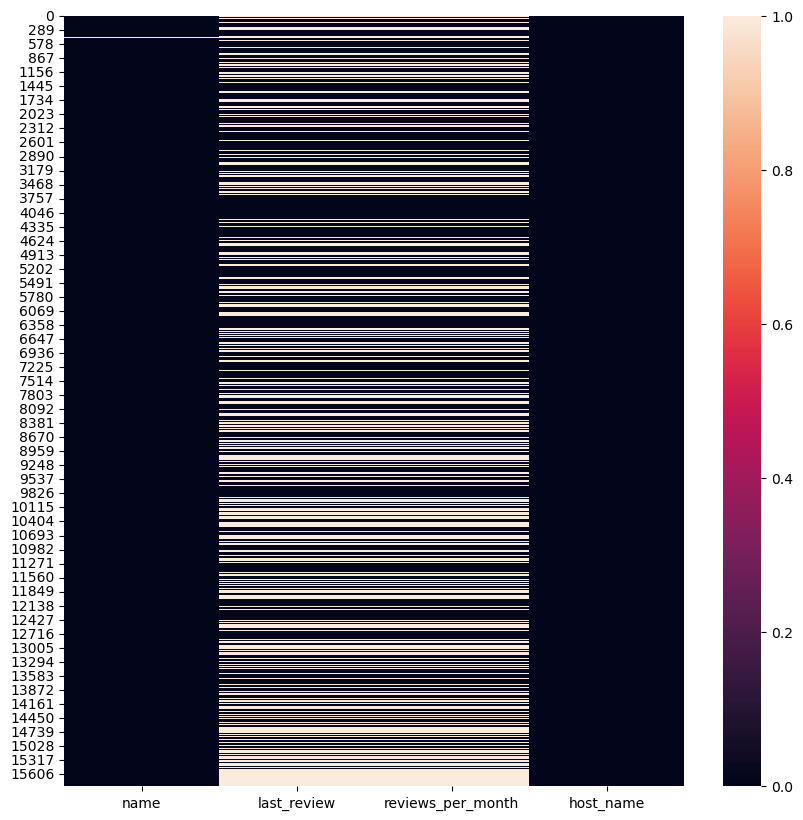

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','last_review','reviews_per_month','host_name',]].isna())

Secara garis besar:  
* *missing value* di kolom `last_review` dan `reviews_per_month`  memiliki proporsi yang cukup tinggi (>10%), dengan missing value mencapai 36.52%.
* *missing value* di kolom `name` dan `host_name`  memiliki proporsi yang cukup rendah (<10%)
* *missing value* di kolom `last_review` dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 36%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

#### `name` 


In [8]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


- Terdapat 8 data kosong pada kolom `name`
- Terdapat 1 host id yang memiliki `calculated_host_listings_count` berjumlah 3. Kita dapat berasumsi bahwa pada listing tersebut memiliki 2 listing lainnya yang memiliki `name` yang sama.
- Pada 7 missing value lainnya tidak terdapat persamaan yang dapat digunakan untuk mengisi pada data kosong tersebut. 

In [9]:
df[df['host_id']==73275200]
# Setelah dilakukan pengecekan ternyata kita dapat mengisi kolom name yang kosong berdasarkan name dari listing yang sama

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [10]:
df['name'].iloc[2075] = 'Errday Guest House'
df[df['host_id']==73275200]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [11]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0


Pada ke 7 kolom `name` data kosong tersebut, kita tidak dapat menemukan hal-hal yang dapat dikaitkan untuk mengisi ke 7 data kosong tersebut. Kita dapat berasumsi bahwa ke 7 data kosong tersebut tidak terisi saat melakukan penginputan data atau ke 7 listing tersebut sudah tidak beroperasi lagi karena pada ke 7 data kosong tersebut, jumlah dari masing-masing data kosong pada kolom `availability_365` berjumlah **365**. Bahkan dari ke 7 listing tersebut hanya 1 listing yang pernah mendapatkan review. Oleh sebab itu, tindakan yang diambil adalah menghapus listing tersebut karena tidak ada cara yang dirasa sesuai untuk mengisi data tersebut.

In [12]:
# Menghapus baris dari ke 7 data missing value
df = df.dropna(subset=['name'])
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### `host_name`

In [13]:
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Kita dapat berasumsi listing tersebut tidak beroperasi, karena pada kolom `availability_365` berjumlah **365** dan terakhir mendapatkan review pada tahun 2017. Selain itu sebuah listing harus memiliki informasi dari nama pemiliknya, karena sebuah listing akan dapat lebih dipercaya apabila penyewa mengetahui nama dari pemiliknya. Maka, penanganan yang dilakukan adalah menghapus listing tersebut.

In [14]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

#### `last_review` 

In [15]:
df[df['last_review'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Terdapat **5784** data kosong pada kolom `last_review`. Data kosong tersebut kosong karena listing tersebut belum pernah mendapatkan review, sehingga kolom `last_review` yang berisi tanggal review terakhir juga kosong. Pada data kosong kita akan membiarkan data kosong tersebut, karena data kosong tersebut berada pada kolom dengan Dtype **datetime** dan kita tidak dapat berasumsi berdasarkan informasi dari kolom lainnya. Kita juga tidak bisa menghapus 5784 baris atau sebesar 36% data dalam dataset ini, karena itu akan berpengaruh pada hasil analisis secara keseluruhan.

In [16]:
df[df['reviews_per_month'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Terdapat **5784** missing value pada kolom `reviews_per_month`. Data kosong tersebut kosong karena listing tersebut belum pernah mendapatkan review, sehingga kolom `reviews_per_month` yang berisi rata-rata review perbulan terakhir juga kosong. Maka, dari informasi tersebut kita dapat mengisi data kosong tersebut dengan nilai **0**.

In [17]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### **Reset Index**
Setelah melakukan tahapan menangani missing value, kita disarankan untuk mengatur ulang index yang ada.

In [18]:
df = df.reset_index(drop=True)
display(df.tail() , df.shape)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15841,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,0.0,1,362,0
15842,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,0.0,14,365,0
15843,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,0.0,14,365,0
15844,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,0.0,14,365,0
15845,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,0.0,14,365,0


(15846, 17)

## **Duplicated Data**

In [19]:
df.duplicated().sum()

0

tidak ditemukannya data yang duplikat

## **Data Distribution**


### Numerik
pertama kita mengelompokan data yang bersifat numerik

In [20]:
numerik = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

### Statistika Deskriptif

In [21]:
numerik.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.584600e+04,15846.000000,15846.000000,15846.000000,15846.000000,15846.000000,15846.000000
mean,3.218430e+03,15.299003,16.662123,0.516433,13.896125,244.317746,3.483277
std,2.497839e+04,50.826976,40.622011,0.952926,30.276103,125.845791,8.918845
min,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


* price : harga termahal untuk listing adalah 1100000 dan termurah adalah 0.
* minimum_night : minimal menyewa paling besar adalah 1125 malam dan paling kecil adalah 1 malam.
* number_of_reviews : rata-rata reviews yang diperoleh adalah 16

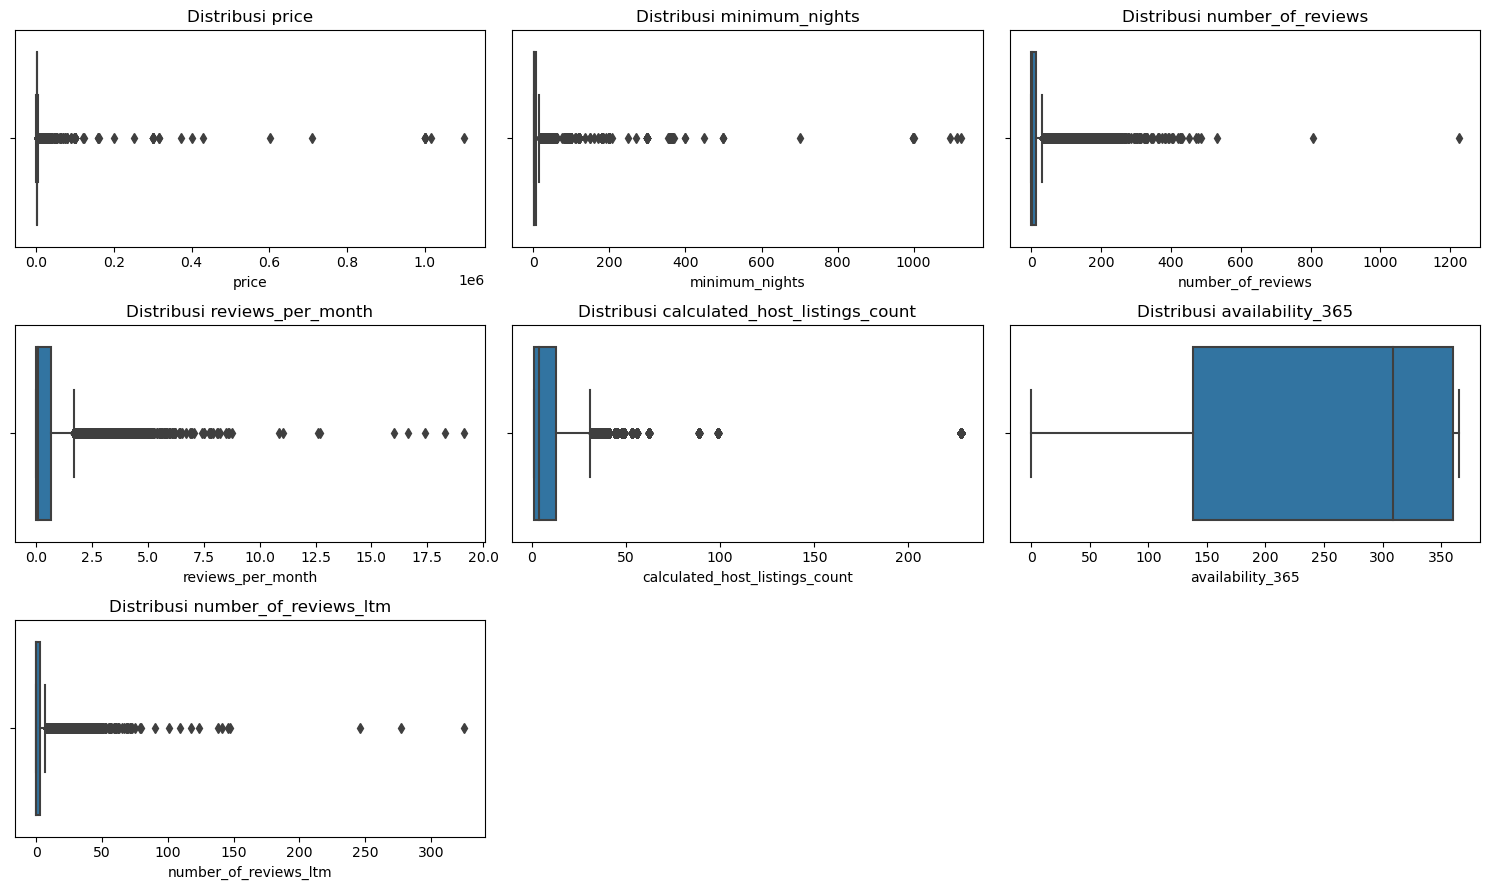

In [22]:
plt.figure(figsize=(15,9))
ax = 1
for kolom in numerik:
    plt.subplot(3,3, ax)
    sns.boxplot(data=df, x=kolom)
    plt.title(f'Distribusi {kolom}')
    ax += 1

plt.tight_layout()
plt.show()

### Outliers

In [ ]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(3,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

### Correlation

In [ ]:
# Membuat korelasi menggunakan metode 'spearman'
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr(method='spearman')

# Membuat matriks yang akan digunakan
matriks = np.triu(df_corr)

# Memvisualisasikan korelasi dalam bentuk 'heatmap'
plt.figure(figsize=(15,5))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, mask=matriks, fmt='.2f')
plt.xticks(rotation= 45)
plt.title("Korelasi Antar Kolom Numerikal")
plt.show()

Terdapat 3 Korelasi yang masuk dalam kategori kuat positif (0.7 - 1). Maka, semakin tinggi nilai suatu data maka semakin tinggi kolom lainnya.
* kolom reviews_per_month berhubungan dengan number_of_reviews
* kolom number_of_reviews_ltm berhubungan dengan number_of_reviews
* kolom number_of_reviews_ltm berhubungan dengan reviews_per_month

## **Data Preparation**



### Formatting Wrong Data Type
mengubah type data yang salah 

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

### Drop Useless Coloumn

In [24]:
df = df.drop(columns=['Unnamed: 0','name', 'host_name', 'last_review'])
df.head(1)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.5,2,353,0


### Populer VS Unpopuler

Analisis ini berfokus pada perbedaan antara listingan populer dan tidak populer. Untuk mendefinisikan listingan sebagai 'populer', kami telah memilih kolom 'review_per_month' sebagai kriteria yang paling sesuai.

Secara khusus, kami mengklasifikasikan listingan dengan nilai 'review_per_month' yang melebihi batas atas rentang Interkuartil (IQR) ditambah 1,5 kali IQR sebagai 'populer'. Semua listingan lainnya akan dikategorikan sebagai 'unpopuler'.

kita dapat mengamati bahwa listingan populer memiliki lebih dari 1,67 'review_per_month'.

In [28]:
df_populer = df[df['reviews_per_month'] >= 1.67].reset_index(drop= True)
df_populer.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1793000,9407280,Vadhana,13.74668,100.56137,Entire home/apt,5034,21,287,2.59,1,349,3
1,1862089,1927968,Sathon,13.72062,100.54707,Entire home/apt,1200,1,419,3.77,37,355,1
2,1862331,8214044,Sathon,13.72073,100.54690,Entire home/apt,1450,1,268,2.59,8,350,7
3,1862377,8214044,Sathon,13.72063,100.54694,Entire home/apt,1200,1,310,3.00,8,331,9
4,1026451,3346331,Sathon,13.71192,100.51535,Entire home/apt,866,2,472,4.02,7,320,29


In [29]:
df_unpopuler = df[df['reviews_per_month'] < 1.67].reset_index(drop= True)
df_unpopuler.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
1,27979,120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0
2,28745,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0
3,35780,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1
4,941865,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0


### Export Cleaned Data

In [ ]:
df_cleaned = df
df_cleaned.head(1)
df_cleaned.to_excel('airbnb_bangkok_cleaned.xlsx')

# Data Analisis

## Analisis Based Price

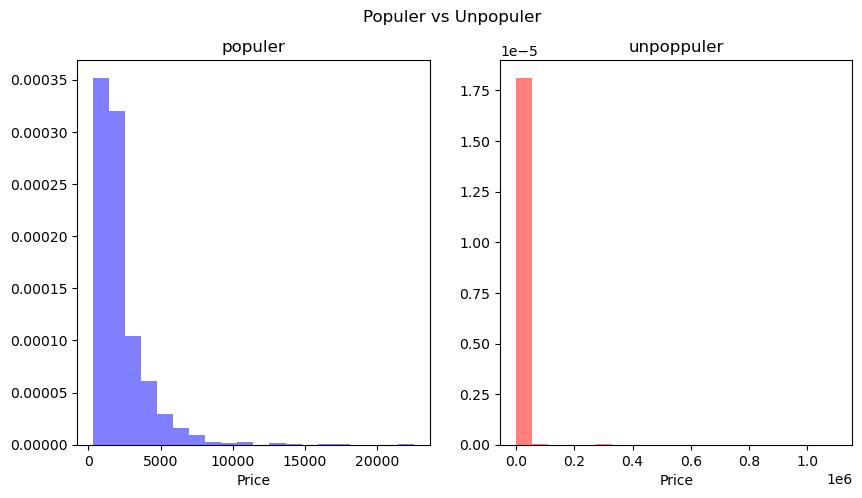

In [31]:


ig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df_populer['price'], bins=20, density=True, alpha=0.5, color='blue')
axs[0].set_title('populer')
axs[0].set_xlabel('Price')



axs[1].hist(df_unpopuler['price'], bins=20, density=True, alpha=0.5, color='red')
axs[1].set_title('unpopuler')
axs[1].set_xlabel('Price')

 
fig.tight_layout()
plt.suptitle('Populer vs Unpopuler')
plt.show()

 dapat menyimpulkan dengan bahwa  harga listingan populer jauh lebih tinggi dibandingkan listingan tidak populer. Temuan ini menunjukkan bahwa penyewa Airbnb di Bangkok, terutama wisatawan, memprioritaskan kenyamanan dan bersedia memilih tempat dengan harga yang relatif lebih tinggi untuk mendapatkan pengalaman yang lebih nyaman dan memuaskan.

## Analysis Based on Room Type

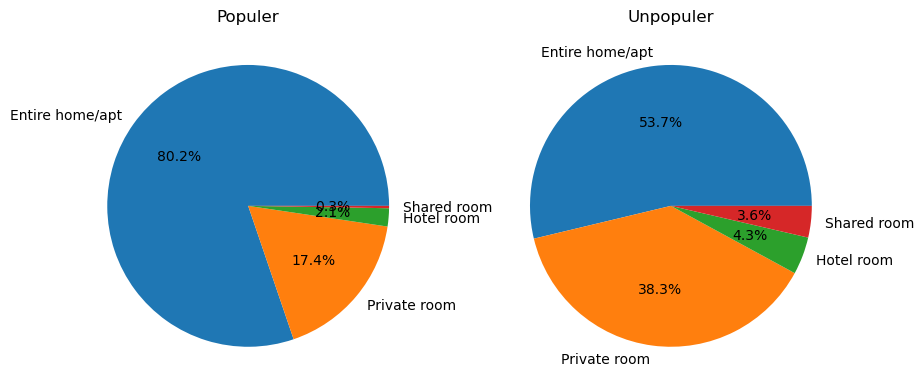

In [61]:
room_type = df_populer['room_type'].value_counts()
room_type_percent = room_type / len(df) * 100

room_type2= df_unpopuler['room_type'].value_counts()
room_type_percent2 = room_type2 / len(df) * 100

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the first pie chart
axs[0].pie(room_type_percent, labels=room_type_percent.index, autopct='%1.1f%%')
axs[0].set_title('Populer')

# Create the second pie chart
axs[1].pie(room_type_percent2, labels=room_type_percent2.index, autopct='%1.1f%%')
axs[1].set_title('Unpopuler')

plt.show()

Setelah memeriksa diagram lingkaran, terlihat bahwa tipe kamar yang paling umum tercantum di kedua kumpulan data adalah ‘seluruh rumah atau apartemen’. Namun, terdapat perbedaan mencolok dalam proporsi daftar ini di antara kedua kumpulan data. Secara khusus, listingan ‘seluruh rumah atau apartemen’ mencakup 80,2% dari kumpulan data populer, sementara itu hanya mencakup 53,8% dalam kumpulan data yang tidak populer.

## Analysis Based on Minimum Stay

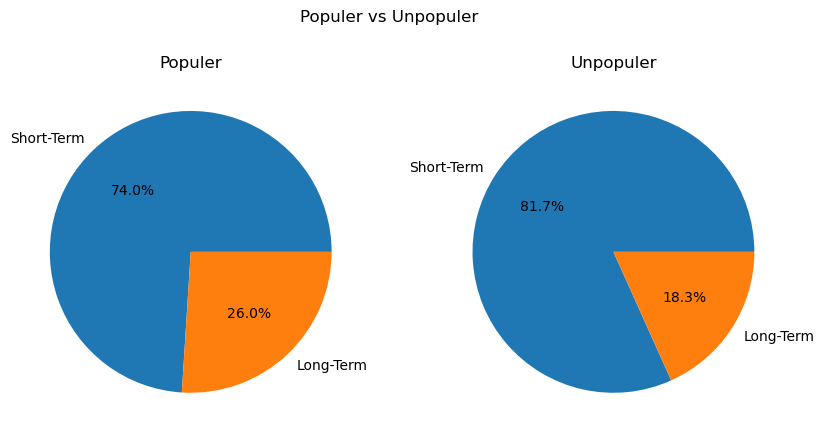

In [66]:
bins = [0, 27, float('inf')]  # Define the bin edges
labels = ['Short-Term', 'Long-Term']  # Define the labels for each category

# Categorize the 'minimum_nights' column based on the defined bins and labels
df_populer['Stay_Type'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels, right=False)

stay_counts1 = df_populer['Stay_Type'].value_counts()

df_unpopuler['Stay_Type'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels, right=False)

stay_counts2 = df_unpopuler['Stay_Type'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].pie(stay_counts1, labels=stay_counts1.index, autopct='%1.1f%%')
axs[0].set_title('Populer')


axs[1].pie(stay_counts2, labels=stay_counts2.index, autopct='%1.1f%%')
axs[1].set_title('Unpopuler')

plt.suptitle('Populer vs Unpopuler')
plt.show()

Melihat diagram lingkaran di atas, terlihat bahwa sebagian besar listingan di kedua kumpulan data dikategorikan sebagai persewaan 'Short-Term'. Namun, proporsi pencatatan ‘Jangka Pendek’ pada kumpulan data ‘Unpopuler’ lebih tinggi, yakni mencapai 81,7% dari seluruh pencatatan, dibandingkan dengan 74% pada kumpulan data ‘Populer’.

## Analysis Based on Neighborhood

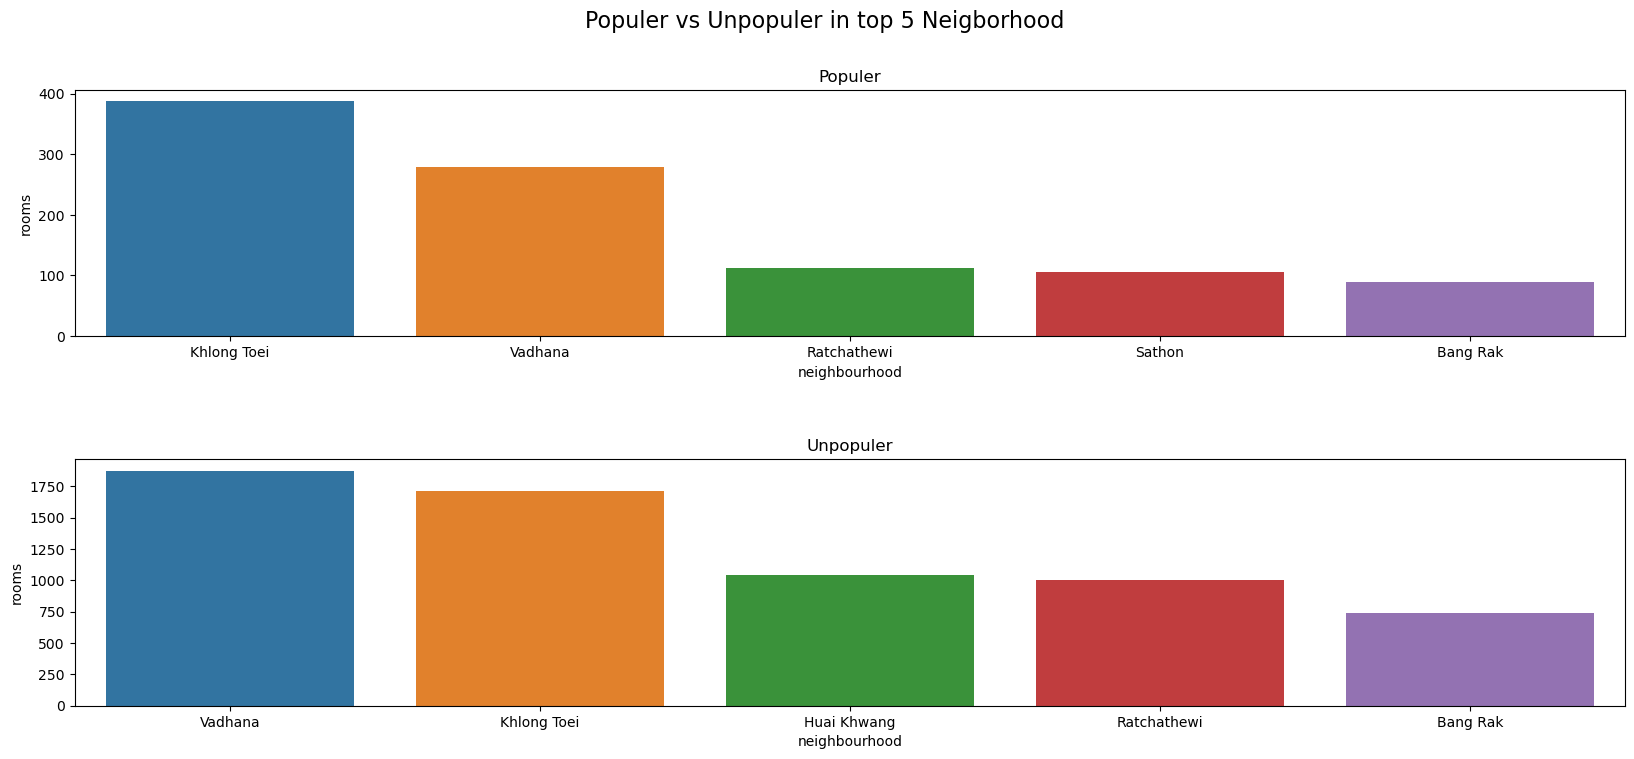

In [43]:
room_total = df_populer.groupby(by='neighbourhood').nunique()[['id']].sort_values('id',ascending= False).reset_index().rename(columns= {'id': 'pop_id'})
df_unpopuler_sorted = df_unpopuler.groupby(by='neighbourhood').nunique()[['id']].sort_values('id',ascending= False).reset_index().rename(columns= {'id': 'unpop_id'})
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(20,8))

sns.barplot(
    data= room_total.rename(columns= {'pop_id' : 'rooms'}).head(),
    x= 'neighbourhood',
    y= 'rooms',
    ax= ax_top
)

ax_top.set_title('Populer')
# ax_top.set_xticklabels(ax_top.get_xticklabels(), rotation= 90)

sns.barplot(
    data= df_unpopuler_sorted.rename(columns= {'unpop_id' : 'rooms'}).head(),
    x= 'neighbourhood',
    y= 'rooms',
    ax= ax_bottom
)

ax_bottom.set_title('Unpopuler')
# ax_bottom.set_xticklabels(ax_bottom.get_xticklabels(), rotation= 90)


plt.suptitle('Populer vs Unpopuler in top 5 Neigborhood', size=16)
plt.subplots_adjust(hspace= 0.5)

plt.show()

Pengamatan ini menunjukkan bahwa 'Khlong Toei' adalah lingkungan yang paling mungkin menampung listingan populer. Penting untuk dicatat bahwa hal ini tidak berarti lingkungan lain kurang populer, namun mereka memiliki distribusi listing populer dan tidak populer yang berbeda-beda.

# Conclusion And Recommendation

### Conclusion

Singkatnya, analisis kami terhadap tempat-tempat Airbnb di Bangkok menghasilkan wawasan yang berharga:

-Harga dan Kenyamanan: Listingan populer di Bangkok cenderung memiliki harga median yang lebih tinggi dan kisaran harga yang lebih luas. Hal ini menunjukkan bahwa wisatawan mengutamakan kenyamanan dan bersedia membayar lebih untuk mendapatkan pengalaman yang menyenangkan. Selain itu, setiap lingkungan menunjukkan kisaran harga yang berbeda.

-Masalah Privasi: Daftar populer juga menawarkan akomodasi 'Seluruh rumah/apartemen', yang menekankan preferensi privasi di kalangan wisatawan.

-Masa Inap Fleksibel: Popularitas akomodasi ‘Jangka Pendek’ mencerminkan preferensi wisatawan untuk menginap lebih pendek.

-Wawasan Lingkungan: Meskipun beberapa lingkungan umum masuk dalam daftar populer dan tidak populer, variasi menunjukkan bahwa daerah tertentu, seperti Huai Khwang dan Sathon, mungkin memiliki daya tarik tersendiri bagi wisatawan.

-Distribusi Lokasi: Listing Populer terkonsentrasi di dekat pusat kota Bangkok, sedangkan Listing Tidak Populer lebih tersebar di pinggiran kota.

### Recommendation

Berdasarkan temuan ini, beberapa rekomendasi dapat diberikan kepada tuan rumah dan pemilik properti di pasar Airbnb Bangkok:

-Harga Kompetitif: Analisis kami menunjukkan bahwa listingan populer di Bangkok cenderung memiliki harga median yang lebih tinggi, dengan 95% harganya berada dalam kisaran 1655.89 dan 1724.11. Oleh karena itu, tuan rumah harus mempertimbangkan untuk menetapkan harga kompetitif yang mencerminkan kualitas dan fasilitas akomodasi mereka, dengan menggunakan interval ini sebagai referensi untuk strategi penetapan harga mereka. Selain itu, tuan rumah juga harus mempertimbangkan kisaran harga di lingkungan mereka, karena kami telah mengamati perbedaan harga di setiap lingkungan populer. Hal ini dapat menarik tamu yang mencari pengalaman lebih nyaman.

-Akomodasi Pribadi: Jika memungkinkan, tawarkan daftar 'Seluruh rumah/apartemen' untuk melayani tamu yang mencari privasi lebih. Hal ini bisa menjadi nilai jual yang signifikan, khususnya bagi wisatawan.

-Pemesanan Fleksibel: Untuk menarik lebih banyak tamu, pertimbangkan untuk menawarkan opsi pemesanan fleksibel, termasuk penginapan jangka pendek. Banyak wisatawan lebih memilih masa menginap yang lebih singkat, sehingga mengakomodasi preferensi tersebut dapat meningkatkan popularitas suatu tempat.

-Pemilihan Lingkungan: Perhatikan lingkungan di mana properti Anda berada. Meskipun beberapa kawasan populer di kalangan wisatawan, kawasan lainnya mungkin tidak begitu menarik. Teliti dan nilai potensi lingkungan Anda dalam hal pariwisata untuk menargetkan audiens Anda dengan lebih baik.

-Ulasan dan Pengalaman Tamu: Dorong ulasan tamu yang positif dengan memberikan layanan yang luar biasa dan menjaga ruang tetap bersih dan nyaman. Ulasan positif dapat memengaruhi popularitas listingan Anda secara signifikan.

Dengan menerapkan rekomendasi ini, tuan rumah dan pemilik properti dapat meningkatkan daya tarik dan popularitas tempat Airbnb mereka di pasar Bangkok yang kompetitif, sehingga pada akhirnya menghasilkan tingkat hunian yang lebih tinggi dan pendapatan yang lebih tinggi.
